# Introducción a la Estadistica Bayesiana

Juan Sosa PhD

Email jcsosam@unal.edu.co

GitHub https://github.com/jstats1702


In [1]:
import numpy as np
import scipy.stats as st
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

## 1  Ejemplo de Motivación: proporción poblacional (Hoff, 2009)

Se quiere estudiar la **prevalencia de una enfermedad** $\theta$ (proporción de la población que padece la enfermedad).

El **espacio de parámetros** es $\Theta=[0,1]$.

Se examinará una muestra aleatoria de $n=20$ individuos para observar **el número de personas infectadas en la muestra** $y$.

El **espacio de observaciones** es $\mathcal{Y} = \{0,\ldots,n\}$.

## 2 Distribución muestral (*Sampling model*)

**Distribución muestral** $p(y|\theta)$: **Mecanismo aleatorio que caracteriza completamente cómo se genera** $y$ **dado un valor específico de** $\theta$.

### 2.1 Ejemplo

**Antes** de realizar el proceso de observación (analizar el fenómeno de interés), $y$ es una variable aleatoria tal que

$$
y\mid\theta\sim\textsf{Binomial}(n,\theta)
\qquad\Longleftrightarrow\qquad
p(y\mid\theta) = \binom{n}{y}\theta^y(1-\theta)^{n-y}.
$$

para $y\in\mathcal{Y}$ y $\theta\in\Theta$.

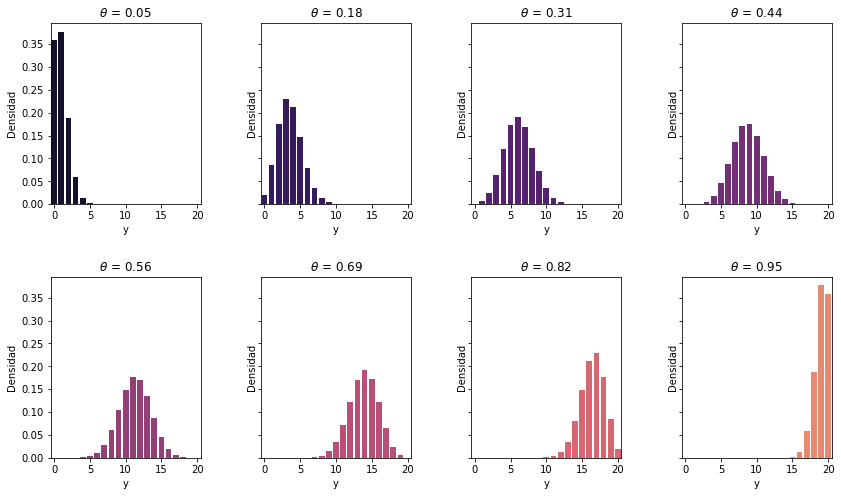

In [2]:
n = 20
m = 8
theta = np.linspace(start = 0.05, stop = 0.95, num = m)
col = sns.color_palette('magma', n_colors = 10)
f, axes = plt.subplots(2, 4, figsize = (14, 8), sharey = True)
plt.subplots_adjust(wspace = 0.4, hspace = 0.4)
for i in range(m):
    sns.barplot(x = np.arange(0, n+1), y = st.binom.pmf(range(n+1), n, theta[i]), color = col[i], ax = axes[int(i>3),i%4])
    axes[int(i>3),i%4].set_ylabel('Densidad')
    axes[int(i>3),i%4].set_xlabel('y')
    axes[int(i>3),i%4].set_title(r'$\theta$ = ' + str(round(theta[i], 2)))
    axes[int(i>3),i%4].set_xticks(np.linspace(0, 20, 5))

## 3 Distribución previa (*prior distribution*)

**Distribución previa $p(\theta)$: Estado de información acerca de $\boldsymbol{\theta}$ antes de que se observen los datos $y$.**

$\theta$ es una **variable aleatoria**.


### Ejemplo

Otros estudios indican que la tasa de infección en ciudades similares oscila entre 0.05 y 0.20, con una prevalencia promedio de 0.10.

Hay **infinitas distribuciones probabilísticas** que satisfacen estas condiciones. Se acostumbra a usar una distribución con una forma matemática conveniente.

Se representa la **información previa** (información externa) acerca de $\theta$ por medio de un miembro de la **familia de distribuciones Beta**, tal que

$$
\theta\sim\textsf{Beta}(a,b)
\qquad\Longleftrightarrow\qquad
p(\theta) = \frac{\Gamma(a+b)}{\Gamma(a)\,\Gamma(b)}\,\theta^{a-1}(1-\theta)^{b-1}
$$

para $a=2$ y $b = 20$.

Bajo esta distribución se tiene que

$$
\textsf{E}(\theta) = 0.0909,\qquad
\textsf{P}(\theta < 0.1) = 0.6353,\qquad
\textsf{P}(0.05 < \theta < 0.2) = 0.6593.
$$


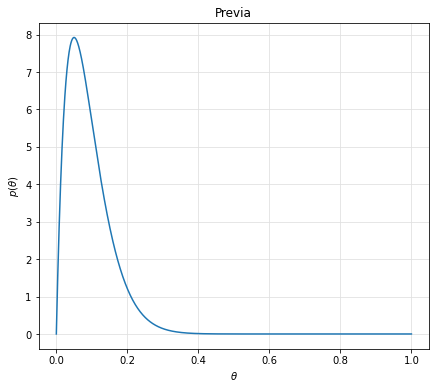

In [3]:
a = 2
b = 20
x = np.linspace(0, 1, 1000)
plt.rcParams["figure.figsize"] = (7, 6)
plt.plot(x,st.beta.pdf(x, a, b))
plt.grid(color = '#e0e0e0')
plt.title('Previa')
plt.xlabel(r'$\theta$')
plt.ylabel(r'$p(\theta)$')
plt.show()

## 4 Distribución posterior (*posterior distribution*)

**Distribución posterior $p(\theta\mid y)$: Estado de información actualizado acerca de $\theta$ después de observar $y$.**

**Después** de realizar el proceso de observación, $y$ es una **cantidad fija**.

La **inferencia estadística** consiste en **aprender** (disminuir la incertidumbre) acerca de los **parámetros** (características) $\boldsymbol{\theta}=(\theta_1,\ldots,\theta_k)$ de una **población** (proceso generativo) a partir de una **fuente de información** (conjunto de datos) $\boldsymbol{y}=(y_1,\ldots,y_n)$ de la misma. 

El **Teorema de Bayes** es el **método racional óptimo** que garantiza la **coherencia y consistencia lógica** para **actualizar el estado de información** acerca de $\boldsymbol{\theta}$ de acuerdo con la información contenida en $\boldsymbol{y}$:
$$
p(\boldsymbol{\theta}\mid \boldsymbol{y}) = \frac{p(\boldsymbol{\theta},\boldsymbol{y})}{p(\boldsymbol{y})} = \frac{p(\boldsymbol{y}\mid\boldsymbol{\theta})\,p(\boldsymbol{\theta})}{\int_\Theta p(\boldsymbol{y}\mid\boldsymbol{\theta})\,p(\boldsymbol{\theta})\,\text{d}\boldsymbol{\theta}}\propto p(\boldsymbol{y}\mid\boldsymbol{\theta})\,p(\boldsymbol{\theta}).
$$

El teorema de Bayes indica **cómo debe cambiar Su estado de información** acerca de $\boldsymbol{\theta}$ bajo la luz de nueva información $\boldsymbol{y}$.

### 4.1 Ejemplo

Bajo el **modelo Beta-Binomial**
$$
\begin{align*}
y\mid\theta &\sim \textsf{Binomial}(n,\theta)\\
\theta      &\sim \textsf{Beta}(a,b)
\end{align*}
$$

![DAG](DAG_introduccion.jpg)

se tiene que la **distribución posterior** de $\theta$ es
$$
\theta\mid y\sim\textsf{Beta}(a+y,b+n-y)
\qquad\Longleftrightarrow\qquad
p(\theta\mid y) = \frac{\Gamma(a+b+n)}{\Gamma(a+y)\,\Gamma(b+n-y)}\,\theta^{a+y-1}(1-\theta)^{b+n-y-1}.
$$


Se observa que ninguno de los individuos de la muestra está infectado, i.e., $y=0$. Entonces, la distribución posterior de $\theta$ es 
$$
\theta\mid y \sim \textsf{Beta}(2,40).
$$


Bajo esta distribución se tiene que
$$
\textsf{E}(\theta\mid y) = 0.0476,\qquad
\textsf{P}(\theta < 0.1\mid y) = 0.9261,\qquad
\textsf{P}(0.05 < \theta < 0.2\mid y) = 0.3843.
$$

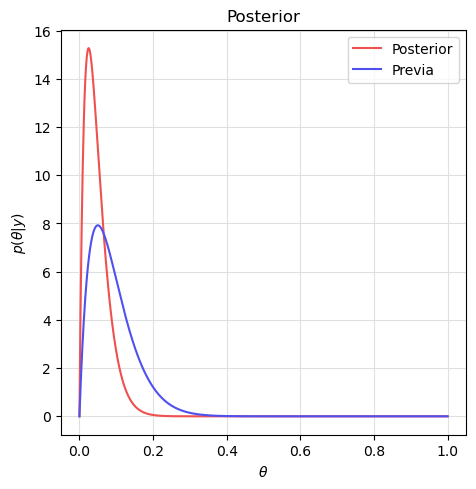

In [4]:
a = 2
b = 20
n = 20
y = 0
f = plt.figure(figsize = (4.5, 4.5),dpi = 100)
axes = f.add_axes([0.1, 0.1, 0.9, 0.9])
axes.set_xlabel(r'$\theta$')
axes.set_ylabel(r'$p(\theta|y)$')
axes.plot(x, st.beta.pdf(x, a+y, b+n-y), color = '#ef5050', label = 'Posterior')
axes.plot(x, st.beta.pdf(x, a, b), color = '#5050ef', label = 'Previa')
plt.grid(color = '#e0e0e0')
plt.title('Posterior')
plt.legend(loc = 0)
plt.show()

## 5 Probabilidad

La **Teoría de la Probabilidad** es una parte de las Matemáticas dedicada a la **cuantificación de la incertidumbre**.

**¡La evaluación de probabilidades es intrínsecamente subjetiva!**


### 5.1 Frecuentista 

Venn, Boole, von Mises, Kolmogorov.

La probabilidad es una **función** definida sobre los subconjuntos de un espacio muestral $\Omega$.

La asignación de probabilidades se restringe a fenómenos intrínsecamente **repetibles** bajo **condiciones idénticas**.

Se define $\textsf{Pr}(A)$ como la **frecuencia relativa en el límite** asociada con la ocurrencia del evento $A$.

**Pro**: matemáticas relativamente sencillas.

**Contra**: solo se aplica a eventos intrínsecamente repetibles.

**La probabilidad se entiende como una propiedad del fenómeno que se estudia**.

	
### 5.2 Bayesiana

Bayes, Laplace, de Finetti, Cox, Jaynes.

Las probabilidad es un **operador condicional** cuyos argumentos son proposiciones de falso-verdadero.

No es posible asignar probabilidades sin hacer supuestos que dependan de **Su estado de información**.

Se define $\textsf{Pr}(A\mid\mathcal{B})$ como la **plausibilidad** (evidencia o cantidad de información) a favor del estatus verdadero de la proposición $A$, basado en Su estado de información $\mathcal{B}$.

**Pro**: todas las formas de incertidumbre son cuantificables.

**Contra**: no hay garantía de que Su respuesta sea considerada como "adecuada" por Otros.

**La probabilidad se refiere a estados mentales sobre el mundo y no al mundo per se**.



## 6 Implicaciones

**Antes**   de realizar el proceso de observación, $\boldsymbol{y}$ es una **variable aleatoria**.

**Después** de realizar el proceso de observación, $\boldsymbol{y}$ es una **cantidad constante**.

Es posible considerar directamente la **información previa** (información externa) acerca de $\boldsymbol{\theta}$.

$\boldsymbol{\theta}$ es una **variable aleatoria**.

La distribución posterior $p(\boldsymbol{\theta}\mid\boldsymbol{y})$ es función de $\boldsymbol{\theta}$ una vez que se observa $\boldsymbol{y}$. **R. Fisher** popularizó esta idea y la llamó **función de verosimilitud**, 
$$
\ell(\boldsymbol{\theta}\mid\boldsymbol{y}) = c\,p(\boldsymbol{y}\mid\boldsymbol{\theta}),
$$ 
donde $c$ es una constante positiva arbitraria. 

$\ell(\boldsymbol{\theta}\mid\boldsymbol{y})$ representa la **información interna** acerca de $\boldsymbol{\theta}$.

La **distribución marginal** de $\boldsymbol{y}$ dada por
$$
p(\boldsymbol{y}) = \int_\Theta p(\boldsymbol{y}\mid\boldsymbol{\theta})\,p(\boldsymbol{\theta})\,\text{d}\boldsymbol{\theta}
$$ 
es una **mezcla** (promedio ponderado) de la **distribución muestral** de $\boldsymbol{y}$ dado $\boldsymbol{\theta}$, ponderada por la **distribución previa** $p(\boldsymbol{\theta})$. 

$p(\boldsymbol{y})$ es una **cantidad constante** respecto a $\boldsymbol{\theta}$ que permite **normalizar** la distribución posterior $p(\boldsymbol{\theta}\mid \boldsymbol{y})$.
	
El **teorema de Bayes** se puede escribir como
$$
p(\boldsymbol{\theta}\mid \boldsymbol{y}) \propto \ell(\boldsymbol{\theta}\mid\boldsymbol{y})\,p(\boldsymbol{\theta})
\qquad
\Longleftrightarrow
\qquad
\log p(\boldsymbol{\theta}\mid \boldsymbol{y}) = \log \ell(\boldsymbol{\theta}\mid\boldsymbol{y}) + \log p(\boldsymbol{\theta}) + c,
$$
donde $c$ es una constante.


## 7 Observaciones

La **inferencia Bayesiana es subjetiva** porque depende del **estado de información** y del **punto de vista** del analista.

La **formulación del modelo no es única**.

Se deben evidenciar los **supuestos del modelo** y examinar **qué tan sensibles son las conclusiones** a perturbaciones razonables de los supuestos.

Los **modelos Bayesianos son jerárquicos**.

La formulación de $p(\boldsymbol{\theta})$ es **fundamental** (a partir de otros estudios, de la opinión de expertos, etc.). 

Se recomienda emplear **distribuciones previas difusas** (distribuciones uniformes en el espacio de parámetros) cuando no se disponga de información previa acerca de $\boldsymbol{\theta}$.

	

## 8 Retos

Formulación de la **distribución previa**.

Cálculo de las **integrales** junto con el **tiempo de computación**.

![life](life.jpg)

## 9 Referencias

![Hoff](Hoffcoverbook.jpg)

![Gelman](Gelmancoverbook.png)